# Konvolutivni slojevi verzija 2

In [12]:
import os
import cv2
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report

Lokacija dataset-a

In [13]:
dataset_path = "../data_set"

In [14]:
classes = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]


Inicijalizacija lista za cuvanje podataka


In [15]:
data = []
labels = []

Ucitavanje slika kroz klase


In [16]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Training", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))  # Da sve slike budu 224x224px
        data.append(img)
        labels.append(classes.index(class_name))

Konvertovanje listi u numpy


In [17]:
data = np.array(data) / 255.0  # Normalizacija vrednosti piksela
data = np.expand_dims(data, axis=-1)
labels = np.array(labels)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


ImageDataGenerator za data augmentation


In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

CNN model sa konvolutivnim slojevima

In [20]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_val, y_val))


Epoch 1/20


/home/teki/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.3605 - loss: 19.2919 - val_accuracy: 0.2944 - val_loss: 13.5446
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/step - accuracy: 0.3604 - loss: 1.6834 - val_accuracy: 0.2944 - val_loss: 51.0925
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 340s 5s/step - accuracy: 0.4217 - loss: 1.5463 - val_accuracy: 0.1742 - val_loss: 11.2111
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/step - accuracy: 0.4444 - loss: 1.8916 - val_accuracy: 0.1185 - val_loss: 3.6542
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - accuracy: 0.4478 - loss: 2.0697 - val_accuracy: 0.2631 - val_loss: 5.2881
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 345s 5s/step - accuracy: 0.4575 - loss: 1.3805 - val_accuracy: 0.3519 - val_loss: 1.7649
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 350s 5s/step - accuracy: 0.5095 - loss: 1.2518 - val_accuracy: 0.5052 - val_loss: 1.3422
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 350s 5s/step - accuracy: 0.5181 - loss: 1.1845 - val_accuracy: 0.5174 - val_loss

Evaluacija modela na test skupu

In [23]:
test_data = []
test_labels = []

In [24]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Testing", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))
        test_data.append(img)
        test_labels.append(classes.index(class_name))


In [25]:
test_data = np.array(test_data) / 255.0
test_data = np.expand_dims(test_data, axis=-1)
test_labels = np.array(test_labels)


Classification report

In [26]:

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 847ms/step


In [27]:
report = classification_report(test_labels, predicted_classes, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.42      0.16      0.23       100
meningioma_tumor       0.31      0.29      0.30       115
        no_tumor       0.34      0.60      0.43       105
 pituitary_tumor       0.30      0.26      0.28        74

        accuracy                           0.33       394
       macro avg       0.34      0.33      0.31       394
    weighted avg       0.34      0.33      0.31       394



Model pokazuje loše performanse u klasifikaciji svih klasa

Preciznost je niska za sve klase, što znači da model često daje pogrešne pozitivne predikcije.

Odziv je takođe nizak za sve klase, što znači da model propušta mnogo stvarnih slučajeva tumora.

F1-score vrednosti pokazuju da model ima slabe performanse za sve klase, posebno za glioma tumor

Kreiranje tabele sa rezultatima

In [28]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)

In [29]:
results = {
    "Model": ["CNN - v2"],
    "Train Loss": [train_loss],
    "Train Accuracy": [train_accuracy],
    "Validation Loss": [val_loss],
    "Validation Accuracy": [val_accuracy],
    "Test Loss": [test_loss],
    "Test Accuracy": [test_accuracy]
}

In [30]:
results_df = pd.DataFrame(results)

# Čuvanje tabele rezultata kao CSV fajl
results_df.to_csv("model_results_cnn2.csv", index=False)

In [31]:
print(results_df)

      Model  Train Loss  Train Accuracy  Validation Loss  Validation Accuracy  \
0  CNN - v2    1.001393        0.624564         0.925593             0.620209   

   Test Loss  Test Accuracy  
0   4.575806       0.332487  


Rezultati

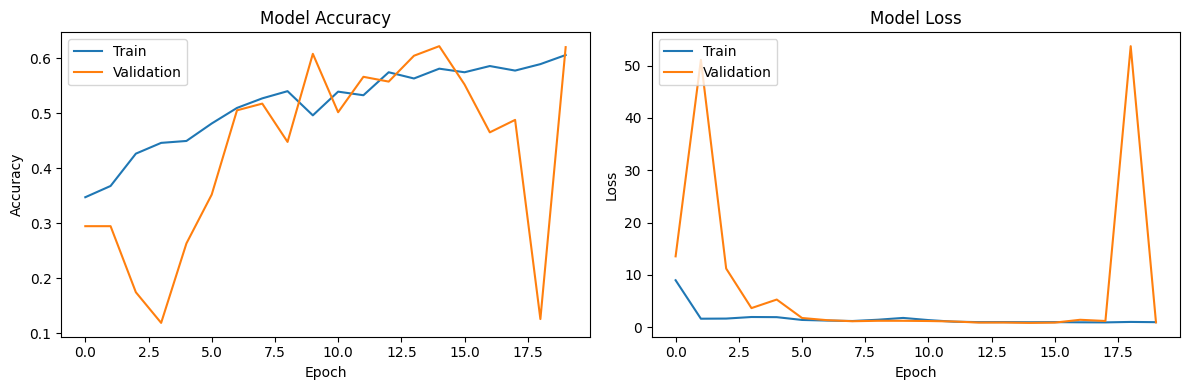

In [32]:
# train history
plt.figure(figsize=(12, 4))

# Plot training, validation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training, validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Accuracy**

Tacnost na validacionom skupu pokazuje znacajne oscilacije kroz epohe, tacnost je takodje dosta niska sto nam govori da ovakva akhitektura mreze nije pogodna za ovaj skup podataka. Takodje se moze uocti da je tacnost na trening skupu relativno stabilna kroz epohe, dok na skupu validacije dosta osciluje, to nam govori da je model verovatno preprilagodjen jer se model lose ponasa sa nepoznatim podacima iz validacionog skupa

**Loss**

Greska validacije dosta visoko osciluje dok je greska na trening skupu stabilna. Ovo nam takodje govori da je model preprilagodjen jer  model dobro uci trening podatke ali ne generalizuje dobro na validacionim podacima.
